In [61]:
#Modules for data manipulation
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

#Modules for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Modules for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Modules for data modeling
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

#Metrics
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('PBJ_Daily_Nurse_Staffing_Q1_2024.csv', low_memory = False, encoding='ISO-8859-1')

In [3]:
data.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240101,50,8.0,8.0,0.0,8.00,8.00,0.0,40.07,40.07,0.0,0.0,0.0,0.0,18.16,18.16,0.0,156.34,156.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240102,49,8.0,8.0,0.0,18.24,18.24,0.0,58.89,58.89,0.0,0.0,0.0,0.0,22.96,22.96,0.0,149.40,149.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240103,49,8.0,8.0,0.0,15.10,15.10,0.0,55.02,55.02,0.0,0.0,0.0,0.0,20.70,20.70,0.0,147.15,147.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240104,50,8.0,8.0,0.0,14.90,14.90,0.0,57.13,57.13,0.0,0.0,0.0,0.0,12.70,12.70,0.0,142.21,142.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240105,51,8.0,8.0,0.0,15.47,15.47,0.0,46.76,46.76,0.0,0.0,0.0,0.0,27.44,27.44,0.0,149.40,149.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Dictionary

RN: Registered Nurses

LPN: Licesensd Practical Nurses

CNA: Certified Nursing Assistants

NA: Nurse Aids

- PROVNUM: Medicare provider number
- PROVNAME: Provider Name
- CITY: Provider City
- STATE: Postal Abbriviation for State
- COUNTY_NAME: Name of Provider County, unique within state
- COUNTY_FIPS: FIPS Code for Provider County, unique within state
- CY_QTR: Calender Quarter
- WorkDate: Day for reported hours
- MDScensus: Resident census from MDS
- Hrs_RNDON: Total Hours for RN Director of Nursing
- Hrs_RNDON_emp: Employee Hours for RN Director of Nursing
- Hrs_RNDON_ctr: Contract Hours for RN Director of Nursing
- Hrs_RNadmin: Hours for RN with administrative duties
- Hrs_RNadmin_emp: Employee Hours for RN with administrative duties
- Hrs_RNadmin_ctr: Contract Hours for RN with administrative duties
- Hrs_RN: Total Hours for RN
- Hrs_RN_emp: Employee Hours for RN
- Hrs_RN_ctr: Contract Hours for RN
- Hrs_LPNadmin: Total Hours for LPN w/ admin duties
- Hrs_LPNadmin_emp: Employee Hours for LPN w/ admin duties
- Hrs_LPNadmin_ctr: Contract Hours for LPN w/ admin duties
- Hrs_LPN: Total Hours for LPN
- Hrs_LPN_emp: Employee Hours for LPN
- Hrs_LPN_ctr: Contract Hours for LPN
- Hrs_CNA: Total Hours for CNA
- Hrs_CNA_emp: Employee Hours for CNA
- Hrs_CNA_ctr: Contract Hours for CNA
- Hrs_NAtrn: Total Hours for Nurse aide in training
- Hrs_NAtrn_emp: Employee Hours for Nurse aide in training
- Hrs_NAtrn_ctr: Contract Hours for Nurse aide in training
- Hrs_MedAide: Total Hours for Med Aide/Technician
- Hrs_MedAide_emp: Employee Hours for Med Aide/Technician
- Hrs_MedAide_ctr: Contract Hours for Med Aide/Technician

In [4]:
data.columns

Index(['PROVNUM', 'PROVNAME', 'CITY', 'STATE', 'COUNTY_NAME', 'COUNTY_FIPS',
       'CY_Qtr', 'WorkDate', 'MDScensus', 'Hrs_RNDON', 'Hrs_RNDON_emp',
       'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr',
       'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin',
       'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp',
       'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn',
       'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp',
       'Hrs_MedAide_ctr'],
      dtype='object')

In [5]:
data.shape

(1330966, 33)

In [6]:
data.isna().sum()

PROVNUM             0
PROVNAME            0
CITY                0
STATE               0
COUNTY_NAME         0
COUNTY_FIPS         0
CY_Qtr              0
WorkDate            0
MDScensus           0
Hrs_RNDON           0
Hrs_RNDON_emp       0
Hrs_RNDON_ctr       0
Hrs_RNadmin         0
Hrs_RNadmin_emp     0
Hrs_RNadmin_ctr     0
Hrs_RN              0
Hrs_RN_emp          0
Hrs_RN_ctr          0
Hrs_LPNadmin        0
Hrs_LPNadmin_emp    0
Hrs_LPNadmin_ctr    0
Hrs_LPN             0
Hrs_LPN_emp         0
Hrs_LPN_ctr         0
Hrs_CNA             0
Hrs_CNA_emp         0
Hrs_CNA_ctr         0
Hrs_NAtrn           0
Hrs_NAtrn_emp       0
Hrs_NAtrn_ctr       0
Hrs_MedAide         0
Hrs_MedAide_emp     0
Hrs_MedAide_ctr     0
dtype: int64

In [7]:
#Grouping the data by provider to aggregate the daily data to quatertly data
provider_data = data.groupby(['PROVNUM','PROVNAME', 'STATE', "COUNTY_NAME", "COUNTY_FIPS"]).agg({
    'MDScensus': 'mean',
    'Hrs_RNDON': 'sum',
    'Hrs_RNDON_emp': 'sum',
    'Hrs_RNDON_ctr': 'sum',
    'Hrs_RNadmin': 'sum',
    'Hrs_RNadmin_emp': 'sum',
    'Hrs_RNadmin_ctr': 'sum',
    'Hrs_RN': 'sum',
    'Hrs_RN_emp': 'sum',
    'Hrs_RN_ctr': 'sum',
    'Hrs_LPNadmin': 'sum',
    'Hrs_LPNadmin_emp': 'sum',
    'Hrs_LPNadmin_ctr': 'sum',
    'Hrs_LPN': 'sum',
    'Hrs_LPN_emp': 'sum',
    'Hrs_LPN_ctr': 'sum',
    'Hrs_CNA': 'sum',
    'Hrs_CNA_emp': 'sum',
    'Hrs_CNA_ctr': 'sum',
    'Hrs_NAtrn': 'sum',
    'Hrs_NAtrn_emp': 'sum',
    'Hrs_NAtrn_ctr': 'sum',
    'Hrs_MedAide': 'sum',
    'Hrs_MedAide_emp': 'sum',
    'Hrs_MedAide_ctr': 'sum'
})

provider_data.reset_index(inplace=True)
provider_data.head()

,PROVNUM,PROVNAME,STATE,COUNTY_NAME,COUNTY_FIPS,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,015009,"BURNS NURSING HOME, INC.",AL,Franklin,59,49.989011,652.43,652.43,0.0,1070.00,1070.00,0.0,4294.05,4294.05,0.0,0.0,0.0,0.0,1954.76,1954.76,0.0,11914.11,11914.11,0.0,0.00,0.00,0.0,0.0,0.0,0.0
1,015010,COOSA VALLEY HEALTHCARE CENTER,AL,Talladega,121,76.934066,520.00,520.00,0.0,2940.50,2940.50,0.0,2653.50,2653.50,0.0,0.0,0.0,0.0,5777.75,5777.75,0.0,17793.00,17793.00,0.0,82.25,82.25,0.0,0.0,0.0,0.0
2,015012,HIGHLANDS HEALTH AND REHAB,AL,Jackson,71,45.076923,518.00,518.00,0.0,978.98,978.98,0.0,2940.44,2940.44,0.0,0.0,0.0,0.0,2434.22,2434.22,0.0,10553.51,10553.51,0.0,1418.32,1418.32,0.0,0.0,0.0,0.0
3,015014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,AL,Jefferson,73,76.879121,80.00,80.00,0.0,0.00,0.00,0.0,3817.84,3817.84,0.0,0.0,0.0,0.0,5669.45,5669.45,0.0,11545.31,11545.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0
4,015015,PLANTATION MANOR NURSING HOME,AL,Jefferson,73,86.648352,520.00,520.00,0.0,0.00,0.00,0.0,2751.91,2751.91,0.0,520.0,520.0,0.0,6558.71,6558.71,0.0,17188.22,17188.22,0.0,0.00,0.00,0.0,0.0,0.0,0.0


In [8]:
provider_data.shape

(14626, 30)

In [9]:
provider_data['RNDON_ratio'] = provider_data['Hrs_RNDON_ctr'] / (provider_data['Hrs_RNDON_ctr'] + provider_data['Hrs_RNDON_emp'])
provider_data['RNDON_ratio'].fillna(0, inplace=True)

provider_data['RNadmin_ratio'] = provider_data['Hrs_RNadmin_ctr'] / (provider_data['Hrs_RNadmin_ctr'] + provider_data['Hrs_RNadmin_emp'])
provider_data['RNadmin_ratio'].fillna(0, inplace=True)

provider_data['RN_ratio'] = provider_data['Hrs_RN_ctr'] / (provider_data['Hrs_RN_ctr'] + provider_data['Hrs_RN_emp'])
provider_data['RN_ratio'].fillna(0, inplace=True)

provider_data['LPNadmin_ratio'] = provider_data['Hrs_LPNadmin_ctr'] / (provider_data['Hrs_LPNadmin_ctr'] + provider_data['Hrs_LPNadmin_emp'])
provider_data['LPNadmin_ratio'].fillna(0, inplace=True)

provider_data['LPN_ratio'] = provider_data['Hrs_LPN_ctr'] / (provider_data['Hrs_LPN_ctr'] + provider_data['Hrs_LPN_emp'])
provider_data['LPN_ratio'].fillna(0, inplace=True)

provider_data['CNA_ratio'] = provider_data['Hrs_CNA_ctr'] / (provider_data['Hrs_CNA_ctr'] + provider_data['Hrs_CNA_emp'])
provider_data['CNA_ratio'].fillna(0, inplace=True)

provider_data['NAtrn_ratio'] = provider_data['Hrs_NAtrn_ctr'] / (provider_data['Hrs_NAtrn_ctr'] + provider_data['Hrs_NAtrn_emp'])
provider_data['NAtrn_ratio'].fillna(0, inplace=True)

provider_data['MedAide_ratio'] = provider_data['Hrs_MedAide_ctr'] / (provider_data['Hrs_MedAide_ctr'] + provider_data['Hrs_MedAide_emp'])
provider_data['MedAide_ratio'].fillna(0, inplace=True)

In [10]:
provider_data.head()

,PROVNUM,PROVNAME,STATE,COUNTY_NAME,COUNTY_FIPS,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr,RNDON_ratio,RNadmin_ratio,RN_ratio,LPNadmin_ratio,LPN_ratio,CNA_ratio,NAtrn_ratio,MedAide_ratio
0,015009,"BURNS NURSING HOME, INC.",AL,Franklin,59,49.989011,652.43,652.43,0.0,1070.00,1070.00,0.0,4294.05,4294.05,0.0,0.0,0.0,0.0,1954.76,1954.76,0.0,11914.11,11914.11,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,015010,COOSA VALLEY HEALTHCARE CENTER,AL,Talladega,121,76.934066,520.00,520.00,0.0,2940.50,2940.50,0.0,2653.50,2653.50,0.0,0.0,0.0,0.0,5777.75,5777.75,0.0,17793.00,17793.00,0.0,82.25,82.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,015012,HIGHLANDS HEALTH AND REHAB,AL,Jackson,71,45.076923,518.00,518.00,0.0,978.98,978.98,0.0,2940.44,2940.44,0.0,0.0,0.0,0.0,2434.22,2434.22,0.0,10553.51,10553.51,0.0,1418.32,1418.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,015014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,AL,Jefferson,73,76.879121,80.00,80.00,0.0,0.00,0.00,0.0,3817.84,3817.84,0.0,0.0,0.0,0.0,5669.45,5669.45,0.0,11545.31,11545.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,015015,PLANTATION MANOR NURSING HOME,AL,Jefferson,73,86.648352,520.00,520.00,0.0,0.00,0.00,0.0,2751.91,2751.91,0.0,520.0,520.0,0.0,6558.71,6558.71,0.0,17188.22,17188.22,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#Considering a 0.4 threshold for the ratio of contract employees to regular employees to filter the providers that have a high contract
#employee ratio in atleast 1 category. This ensures we focus on providers who are more likely to be customers for Clipboard Health.

filtered_data = provider_data.loc[(provider_data['RNDON_ratio'] > 0.4) | (provider_data['RNadmin_ratio'] > 0.4) | (provider_data['RN_ratio'] > 0.4) | 
                         (provider_data['LPNadmin_ratio'] > 0.4) | (provider_data['LPN_ratio'] > 0.4) | (provider_data['CNA_ratio'] > 0.4) | 
                         (provider_data['NAtrn_ratio'] > 0.4) | (provider_data['MedAide_ratio'] > 0.4)]
filtered_data.head()

,PROVNUM,PROVNAME,STATE,COUNTY_NAME,COUNTY_FIPS,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr,RNDON_ratio,RNadmin_ratio,RN_ratio,LPNadmin_ratio,LPN_ratio,CNA_ratio,NAtrn_ratio,MedAide_ratio
7,015023,HATLEY HEALTH CARE INC,AL,Chilton,21,86.307692,440.00,440.00,0.00,507.13,507.13,0.0,7222.53,7222.53,0.00,0.00,0.00,0.0,7442.34,2464.73,4977.61,12534.55,12534.55,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.668823,0.000000,0.0,0.0
12,015032,DIVERSICARE OF FOLEY,AL,Baldwin,3,128.494505,394.25,64.00,330.25,2024.69,1968.69,56.0,3112.02,3112.02,0.00,0.00,0.00,0.0,8241.61,8241.61,0.00,22939.99,22939.99,0.00,0.00,0.00,0.0,1398.13,1398.13,0.0,0.837666,0.027659,0.000000,0.0,0.000000,0.000000,0.0,0.0
17,015044,"CAREGIVERS OF PLEASANT GROVE, INC",AL,Jefferson,73,43.164835,573.75,573.75,0.00,659.00,659.00,0.0,862.37,462.00,400.37,698.00,698.00,0.0,2665.44,2051.25,614.19,9481.86,8951.50,530.36,0.00,0.00,0.0,2141.25,2141.25,0.0,0.000000,0.000000,0.464267,0.0,0.230427,0.055934,0.0,0.0
32,015076,FAIR HAVEN,AL,Jefferson,73,221.318681,606.50,606.50,0.00,4608.00,4608.00,0.0,6775.50,3012.75,3762.75,1352.25,1352.25,0.0,13927.85,10458.00,3469.85,54830.25,47097.50,7732.75,0.00,0.00,0.0,904.00,904.00,0.0,0.000000,0.000000,0.555346,0.0,0.249130,0.141031,0.0,0.0
46,015113,RIVER CITY CENTER,AL,Morgan,103,154.978022,431.50,431.50,0.00,742.00,742.00,0.0,8148.13,8148.13,0.00,0.00,0.00,0.0,11522.89,6808.49,4714.40,21009.71,14692.23,6317.48,453.94,453.94,0.0,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.409133,0.300693,0.0,0.0


In [12]:
filtered_data.shape

(2534, 38)

In [13]:
filtered_data.to_csv('filtered_data.csv', index=False)

In [14]:
filtered_data.describe()

,COUNTY_FIPS,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr,RNDON_ratio,RNadmin_ratio,RN_ratio,LPNadmin_ratio,LPN_ratio,CNA_ratio,NAtrn_ratio,MedAide_ratio
count,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.00000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000
mean,85.959747,86.263285,473.524929,429.474878,44.050051,961.760651,882.056938,79.703713,3272.184886,2351.758489,920.426397,566.345837,533.049479,33.296358,6028.952289,4141.530209,1887.42208,16258.440316,12549.229961,3709.210355,339.661811,308.157979,31.503832,725.871646,646.525110,79.346535,0.088613,0.172223,0.264885,0.085427,0.312480,0.221153,0.028635,0.061034
std,98.839827,56.842892,221.699601,244.223113,132.072968,1150.493675,1099.099864,265.348011,3393.060774,2455.403293,1755.463093,795.596908,761.892390,233.539933,4441.710112,3313.081401,2383.79902,11615.279874,9484.948492,5080.784329,1138.195229,934.206565,430.685383,1445.694599,1309.366443,333.224628,0.258638,0.337351,0.271577,0.263471,0.261540,0.215121,0.160596,0.201872
min,1.000000,5.296703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,48.972527,435.000000,395.375000,0.000000,142.550000,18.250000,0.000000,1363.702500,867.805000,12.037500,0.000000,0.000000,0.000000,2916.752500,1728.560000,224.12000,8985.250000,6521.625000,316.132500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006402,0.000000,0.065958,0.027617,0.000000,0.000000
50%,63.000000,76.252747,488.000000,472.500000,0.000000,615.125000,528.685000,0.000000,2361.215000,1720.835000,401.205000,331.925000,270.140000,0.000000,5170.340000,3408.250000,1101.57500,13718.195000,10570.975000,2082.165000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.179583,0.000000,0.286488,0.162787,0.000000,0.000000
75%,113.000000,106.906593,520.000000,512.000000,0.000000,1319.555000,1248.562500,35.375000,4039.397500,2965.812500,1116.437500,903.495000,855.362500,0.000000,8057.127500,5727.992500,2656.66000,20032.135000,16119.950000,5045.667500,120.940000,105.937500,0.000000,935.212500,778.212500,0.000000,0.000000,0.097651,0.455563,0.000000,0.491778,0.369182,0.000000,0.000000
max,820.000000,734.120879,5518.500000,5518.500000,936.000000,14606.920000,11276.610000,5550.500000,44445.110000,32214.350000,29468.930000,8856.810000,8856.810000,8193.220000,46180.420000,38586.210000,28633.92000,137313.770000,119751.470000,53340.170000,34431.000000,16909.000000,17522.000000,17266.250000,12641.100000,5970.710000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Based on the basic statistical description of the dataset, we can see the average working hours for:
- RN Director of Nursing - Employees: 429.47
- RN Director of Nursing - Contractor: 44.05
- RN Administrator - Employee: 882.05
- RN Administrator - Contractor: 79.70
- RN - Employee: 2351.75
- RN - Contractor: 920.45
- LPN Administrator - Employee: 533.05
- LPN Administrator - Contractor: 33.29
- LPN - Employee: 4141.53
- LPN - Contractor: 1887.42
- CNA - Employee: 12549.23
- CNA - Contractor: 3709.21
- NA Trainie - Employee: 308.16
- NA Trainie - Contractor: 31.5
- Med Aide - Employee: 646.52
- Med Aide - Contractor: 79.35

The Average Contractor-to-Employee ratios for the 3 roles we are considering:
- RN: 0.265
- LPN: 0.312
- CNA: 0.221


In [15]:
filtered_data.isnull().sum()

PROVNUM             0
PROVNAME            0
STATE               0
COUNTY_NAME         0
COUNTY_FIPS         0
MDScensus           0
Hrs_RNDON           0
Hrs_RNDON_emp       0
Hrs_RNDON_ctr       0
Hrs_RNadmin         0
Hrs_RNadmin_emp     0
Hrs_RNadmin_ctr     0
Hrs_RN              0
Hrs_RN_emp          0
Hrs_RN_ctr          0
Hrs_LPNadmin        0
Hrs_LPNadmin_emp    0
Hrs_LPNadmin_ctr    0
Hrs_LPN             0
Hrs_LPN_emp         0
Hrs_LPN_ctr         0
Hrs_CNA             0
Hrs_CNA_emp         0
Hrs_CNA_ctr         0
Hrs_NAtrn           0
Hrs_NAtrn_emp       0
Hrs_NAtrn_ctr       0
Hrs_MedAide         0
Hrs_MedAide_emp     0
Hrs_MedAide_ctr     0
RNDON_ratio         0
RNadmin_ratio       0
RN_ratio            0
LPNadmin_ratio      0
LPN_ratio           0
CNA_ratio           0
NAtrn_ratio         0
MedAide_ratio       0
dtype: int64

array([[<Axes: title={'center': 'RNDON_ratio'}>,
        <Axes: title={'center': 'RNadmin_ratio'}>,
        <Axes: title={'center': 'RN_ratio'}>],
       [<Axes: title={'center': 'LPN_ratio'}>,
        <Axes: title={'center': 'CNA_ratio'}>,
        <Axes: title={'center': 'NAtrn_ratio'}>],
       [<Axes: title={'center': 'MedAide_ratio'}>, <Axes: >, <Axes: >]],
      dtype=object)

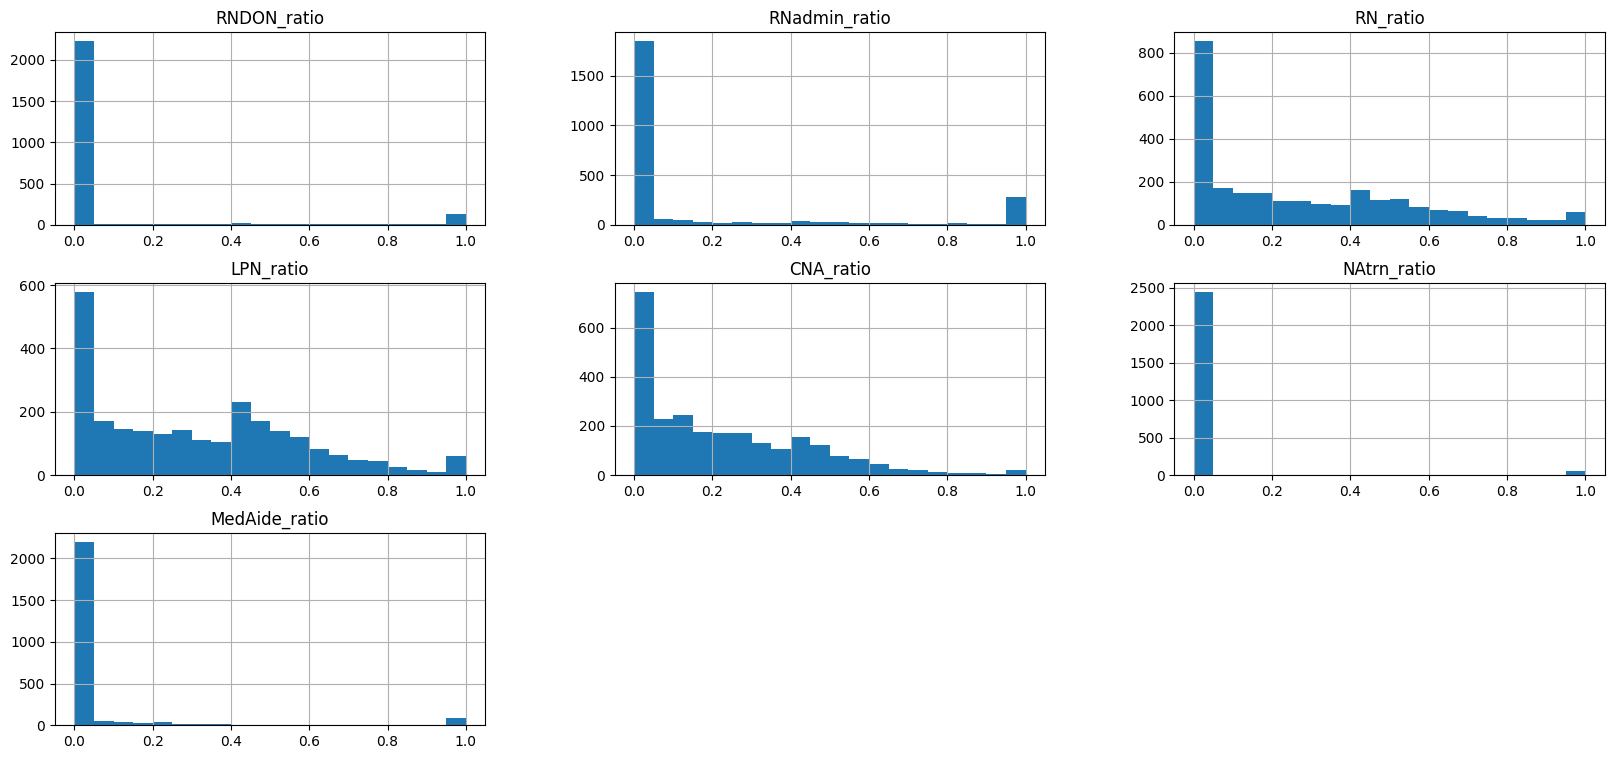

In [16]:
filtered_data[['RNDON_ratio', 'RNadmin_ratio', 'RN_ratio', 'LPN_ratio', 'CNA_ratio', 'NAtrn_ratio', 'MedAide_ratio']].hist(bins = 20, 
                                                                                                                        figsize = (20, 9))

Administrative roles and leadeership positions (like RN Director, Med Aides, RN admins) are primarily filled by employees, with little to no use of contract staff. However, RN's, LPN's and CNA's show much more variation in contract usage.

Some facilites are heavily dependent on contract roles having contract-to-employee ratio near 1.0.

<Axes: >

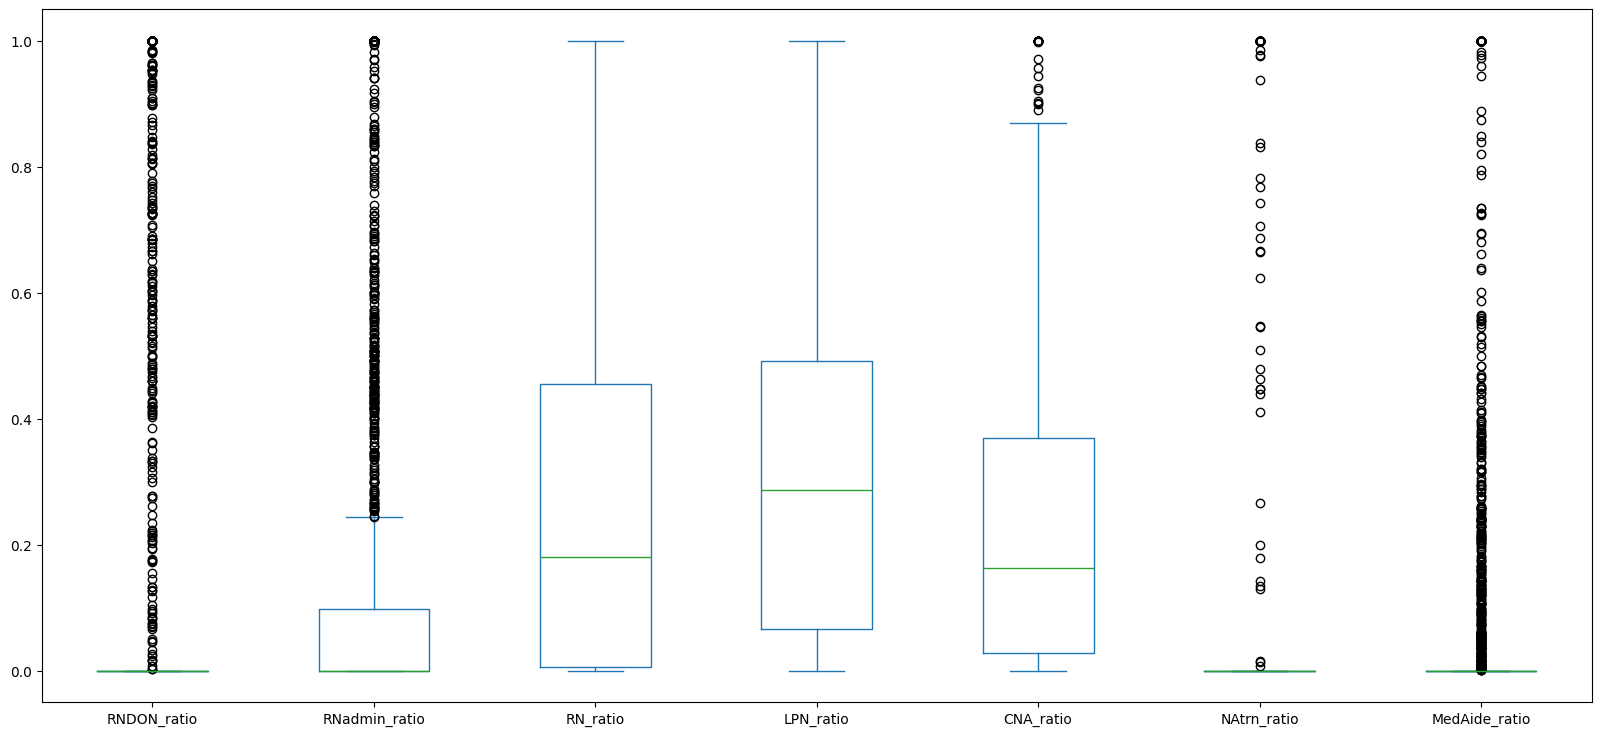

In [17]:
filtered_data[['RNDON_ratio', 'RNadmin_ratio', 'RN_ratio', 'LPN_ratio', 'CNA_ratio', 'NAtrn_ratio', 'MedAide_ratio']].plot(kind = 'box', 
                                                                                                                        figsize=(20, 9))

Based on the box plots we can conclude that:
- RN Directors of Nursing and RN Administrative staff are almost exclusively filled by employees and very few contract staff are hired for these positions.
- The relaiance on contract staff is higher for Registered Nurses (RN), Licensed Practical Nurses (LPN) and Certified Nursing Assistants (CNA) than in more senior adminstrative roles, but there is a significant variations between providers. Some rely heavily on contract staff while others do not.
- For most roles (other than RN, LPN and CNA) have a low median value, close to 0, indicating that majority of facilities are reliant on full-time employees, not contract workers.
- Based on this, we can focus our analysis on the roles that have some distribution of contract workers (RN, LPN, CNA).


### Outlier Analysis

In [18]:
#Lets focus on the outliers in the CNA_ratio column.
IQR = filtered_data['CNA_ratio'].quantile(0.75) - filtered_data['CNA_ratio'].quantile(0.25)
upper_fence = filtered_data['CNA_ratio'].quantile(0.75) + (IQR * 1.5)
outliers = filtered_data[filtered_data['CNA_ratio'] > upper_fence]

outliers.head()

,PROVNUM,PROVNAME,STATE,COUNTY_NAME,COUNTY_FIPS,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr,RNDON_ratio,RNadmin_ratio,RN_ratio,LPNadmin_ratio,LPN_ratio,CNA_ratio,NAtrn_ratio,MedAide_ratio
791,055510,REDDING POST ACUTE,CA,Shasta,89,69.681319,512.00,512.00,0.0,0.00,0.0,0.00,1507.07,1507.07,0.00,1024.00,1024.00,0.0,7238.22,6731.80,506.42,1994.60,0.00,1994.60,14443.4,14443.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.069965,1.000000,0.0,0.0
1419,065412,"GREEN HOUSE HOMES AT MIRASOL, THE",CO,Larimer,69,76.604396,0.00,0.00,0.0,0.00,0.0,0.00,105.20,0.00,105.20,5622.35,5622.35,0.0,1691.82,0.00,1691.82,1706.95,0.00,1706.95,0.0,0.0,0.0,328.8,0.0,328.8,0.0,0.0,1.0000,0.0,1.000000,1.000000,0.0,1.0
2214,105910,CORAL REEF SUBACUTE CARE CENTER LLC,FL,Miami-Dade,86,165.956044,280.00,0.00,280.0,2102.74,0.0,2102.74,15726.06,0.00,15726.06,0.00,0.00,0.0,2610.54,0.00,2610.54,34564.66,0.00,34564.66,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0000,0.0,1.000000,1.000000,0.0,0.0
2452,115327,WILLOWWOOD HEALTHCARE AND REHABILITATION,GA,Hall,139,93.472527,520.00,520.00,0.0,0.00,0.0,0.00,1524.43,25.00,1499.43,0.00,0.00,0.0,7826.35,2199.83,5626.52,16495.09,1622.75,14872.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9836,0.0,0.718920,0.901622,0.0,0.0
2459,115340,CALHOUN HEALTH CARE CENTER,GA,Gordon,129,94.912088,519.88,519.88,0.0,0.00,0.0,0.00,959.75,959.75,0.00,0.00,0.00,0.0,7315.75,1958.75,5357.00,18303.02,1442.00,16861.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.732256,0.921215,0.0,0.0


Based on this list of outliers, Clipboard Health can take the following measures:
- **Statewide Targeting**: Focus on states like Texas, Georgia, and North Carolina that have multiple counties showing up as outliers. These states might require more robust contractor staffing solutions due to systemic issues such as population growth, healthcare shortages, or wage constraints.
- **Urban and Rural Dual Approach**: Offer tailored solutions to both urban counties (e.g., Harris, Clark, Miami-Dade) and rural counties (e.g., Preston, Ashe, Real) by emphasizing the unique benefits of contractor flexibility and scalability.
- **Focus on High-Growth and Aging Regions**: Counties in states with growing populations or aging demographics (e.g., Florida, Texas, Georgia, Maine) may present long-term opportunities for Clipboard Health to grow its market share by providing staffing solutions to meet increasing demand.

In [19]:
rn_25 = filtered_data['RN_ratio'].quantile(0.25)
lpn_25 = filtered_data['LPN_ratio'].quantile(0.25)
cna_75 = filtered_data['CNA_ratio'].quantile(0.75)

filtered_data_ratios = filtered_data[(filtered_data['RN_ratio'] < rn_25) & (filtered_data['LPN_ratio'] < lpn_25) & (filtered_data['CNA_ratio'] > cna_75)]

filtered_data_ratios.head()

,PROVNUM,PROVNAME,STATE,COUNTY_NAME,COUNTY_FIPS,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr,RNDON_ratio,RNadmin_ratio,RN_ratio,LPNadmin_ratio,LPN_ratio,CNA_ratio,NAtrn_ratio,MedAide_ratio
691,055241,WILLOW PASS HEALTHCARE CENTER,CA,Contra Costa,13,80.802198,368.00,368.00,0.0,258.50,258.50,0.0,3077.50,3077.50,0.0,673.00,673.00,0.0,4526.00,4461.50,64.50,17237.75,8667.00,8570.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.014251,0.497208,0.0,0.0
1170,056422,FREMONT HEALTHCARE CENTER,CA,Alameda,1,100.582418,496.00,496.00,0.0,916.60,864.10,52.5,6782.75,6782.75,0.0,987.76,987.76,0.0,4824.95,4727.26,97.69,24380.69,14585.24,9795.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057277,0.0,0.0,0.020247,0.401771,0.0,0.0
2597,115560,GATEWAY HEALTH AND REHAB,GA,White,311,47.109890,632.00,632.00,0.0,254.00,254.00,0.0,749.40,749.40,0.0,424.12,424.12,0.0,3972.23,3972.23,0.00,7685.90,4530.04,3155.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.410604,0.0,0.0
3406,146066,ALPINE FIRESIDE HEALTH CENTER,IL,Winnebago,201,34.000000,747.23,747.23,0.0,367.28,367.28,0.0,1385.64,1385.64,0.0,0.00,0.00,0.0,1604.76,1604.76,0.00,10595.99,4953.42,5642.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.532519,0.0,0.0
4189,165320,"ZEARING HEALTH CARE, LLC",IA,Story,169,35.780220,521.00,521.00,0.0,512.00,512.00,0.0,2361.96,2361.96,0.0,0.00,0.00,0.0,722.19,722.19,0.00,6713.61,3647.61,3066.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.456684,0.0,0.0


These providers are potential customers for Clipboard Health as they have a high ratio of contractors for the CNA role but very low staffing for RN and LPN roles

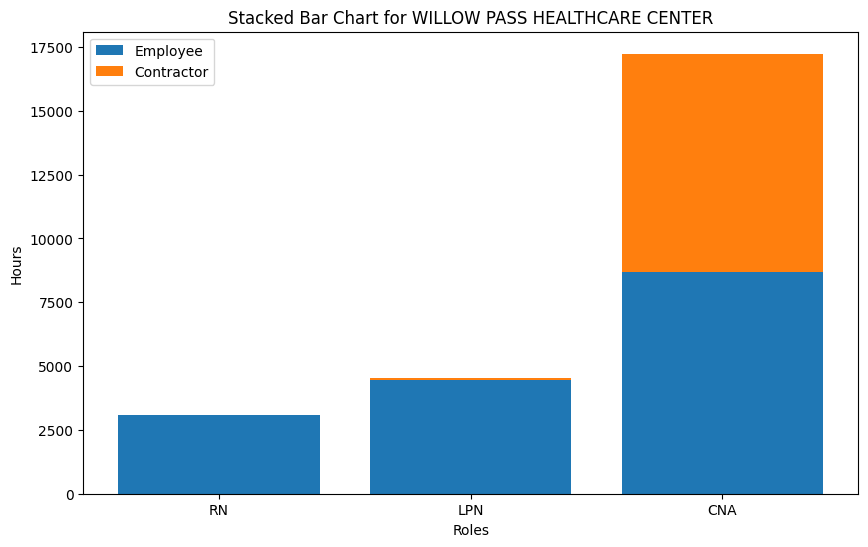

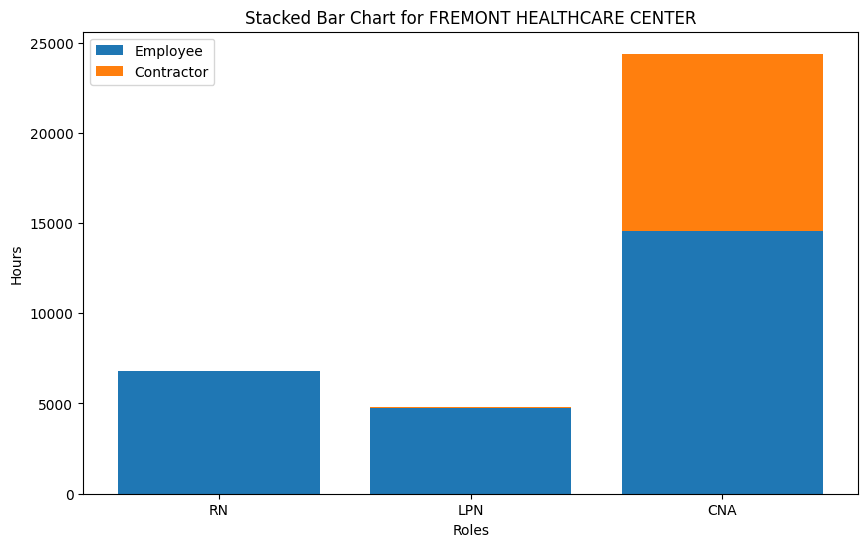

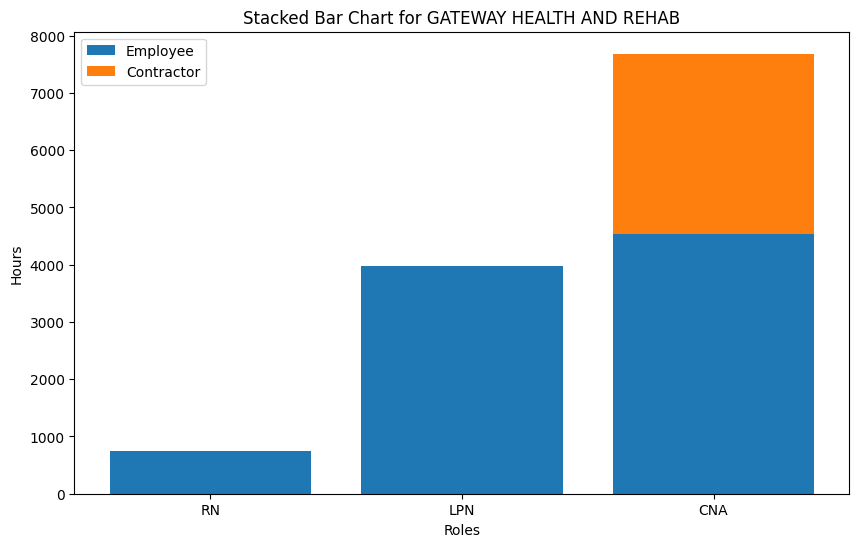

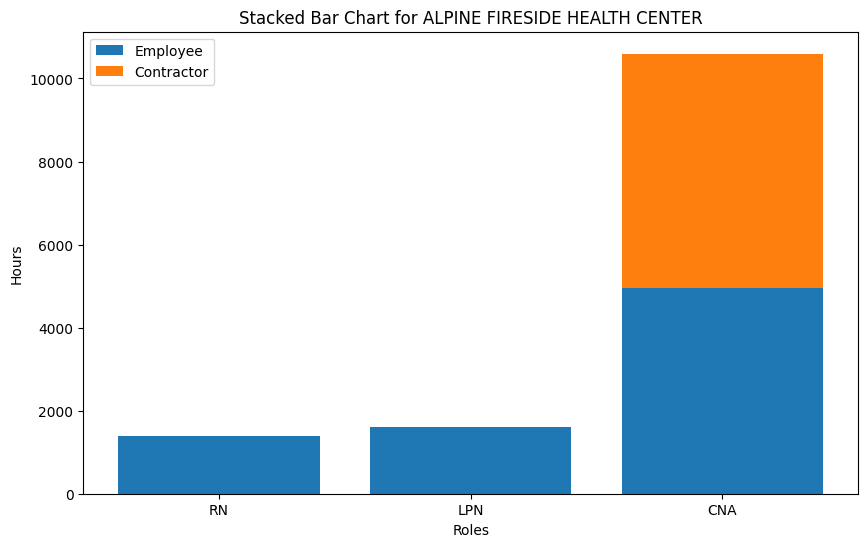

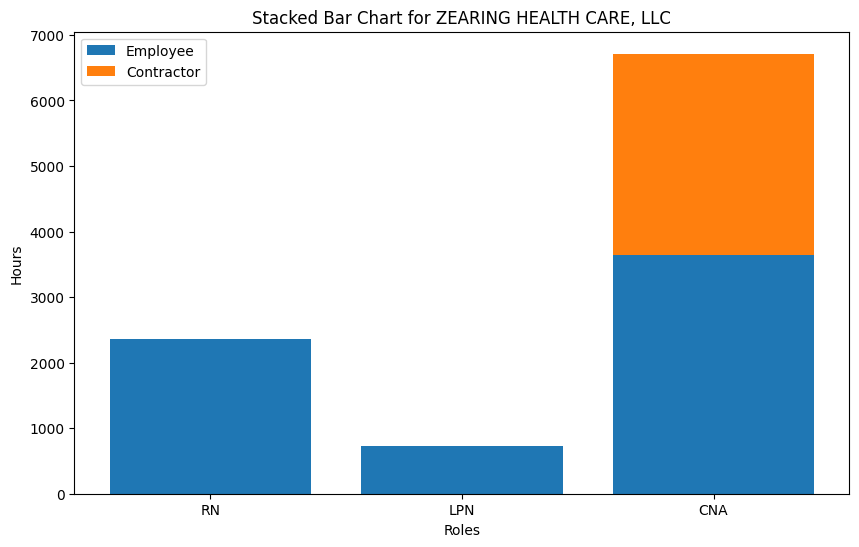

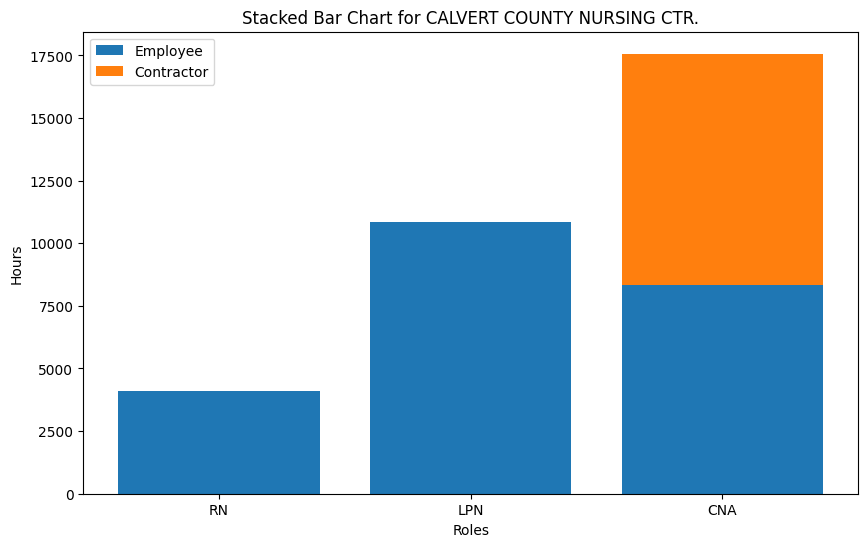

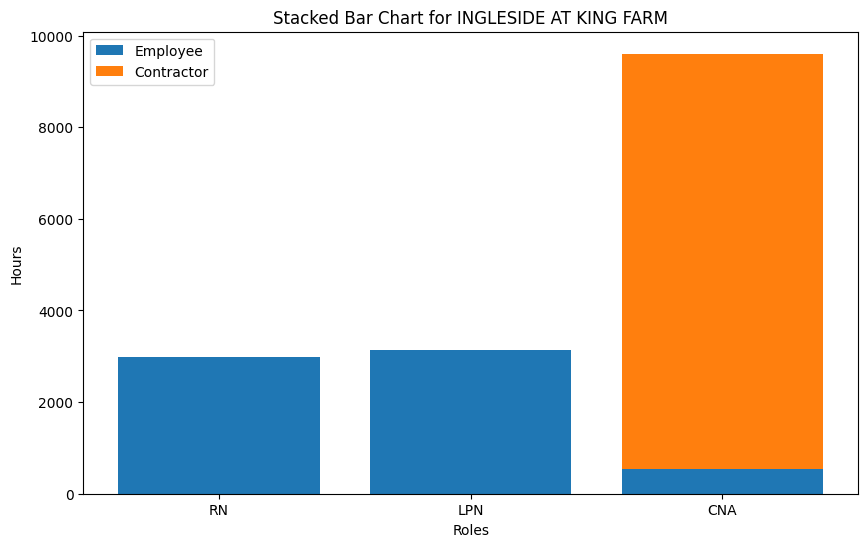

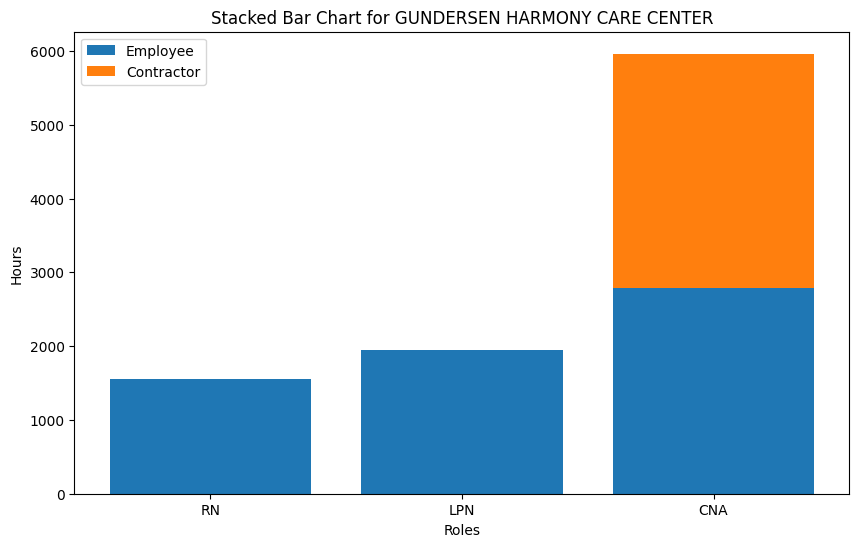

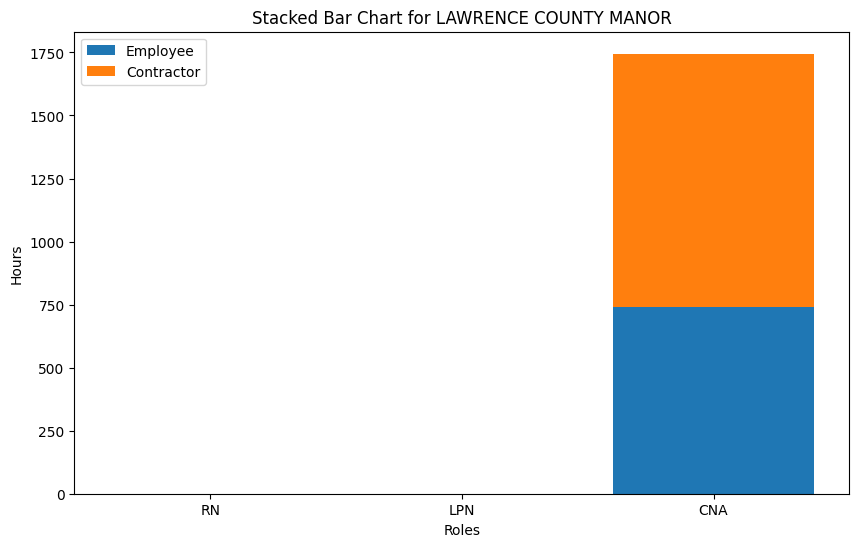

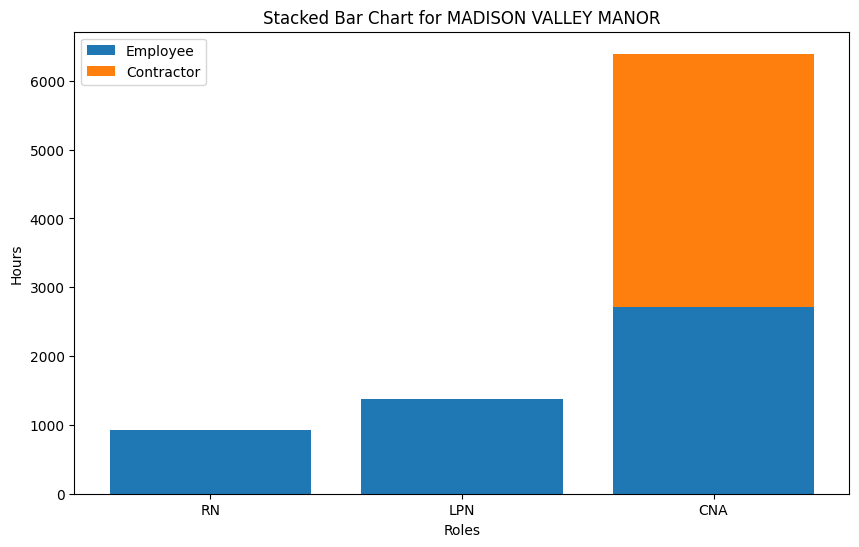

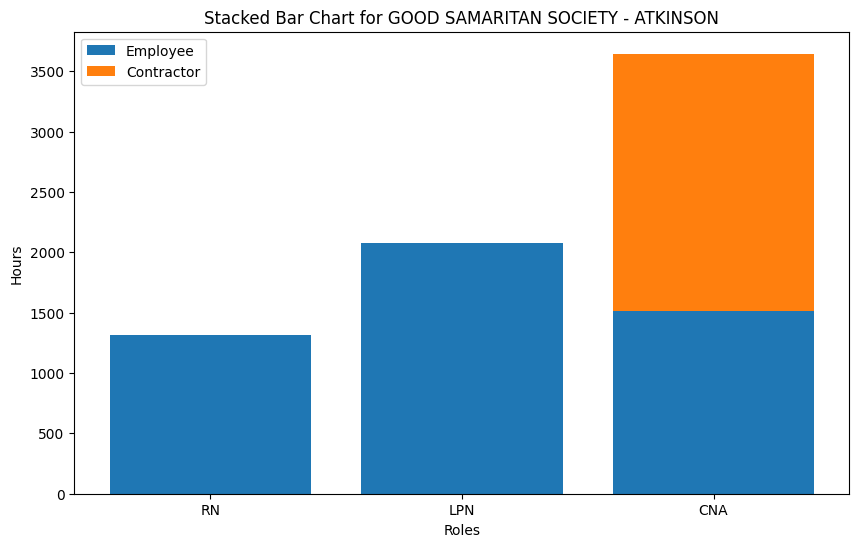

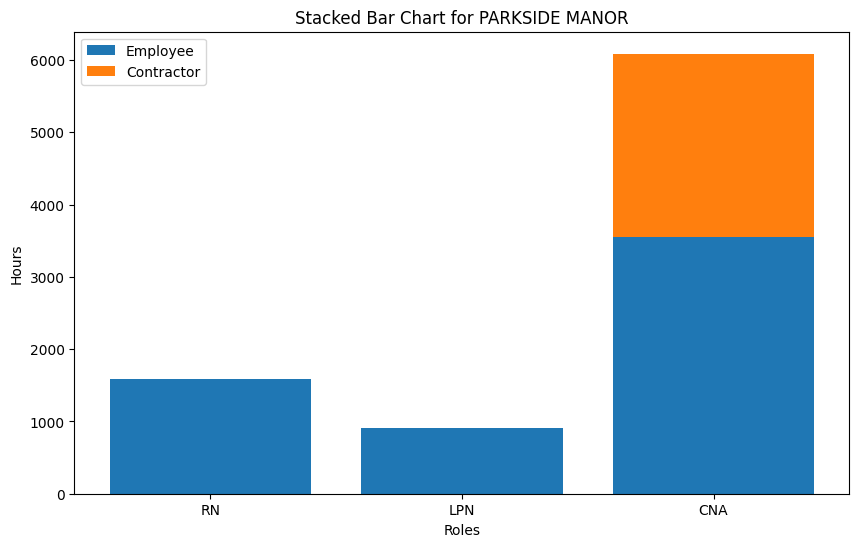

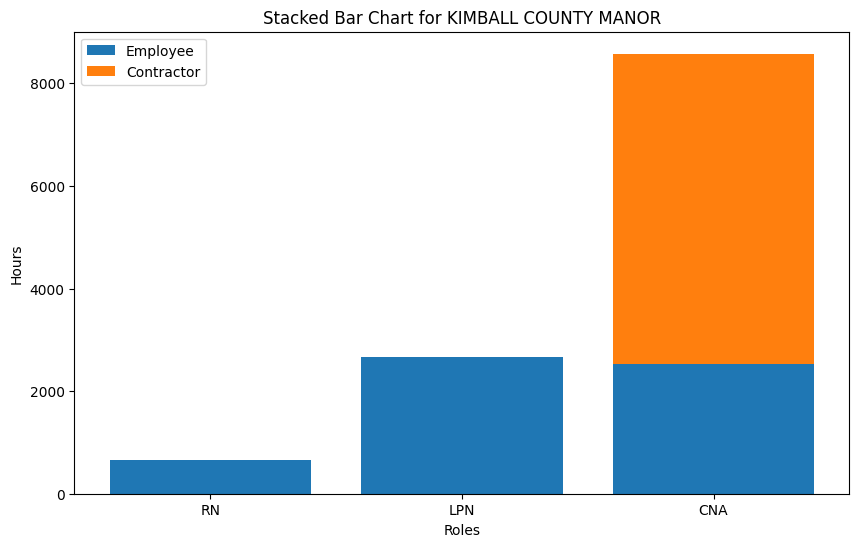

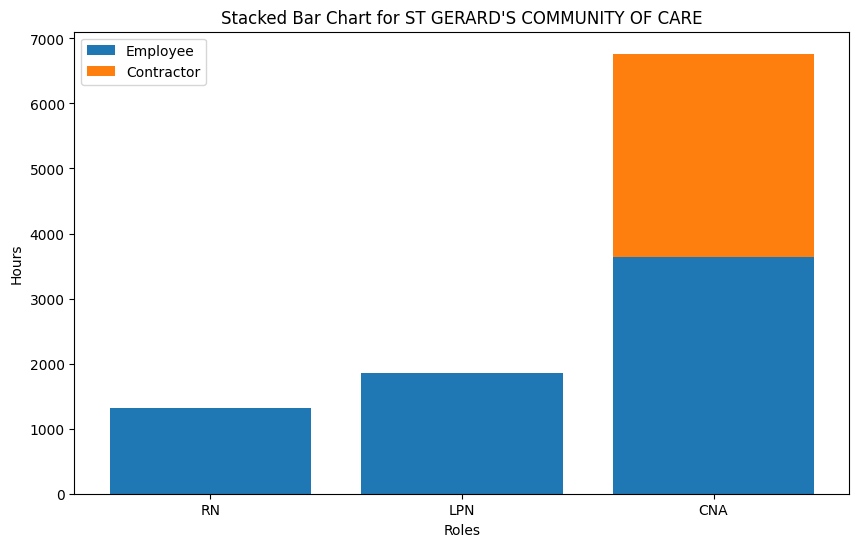

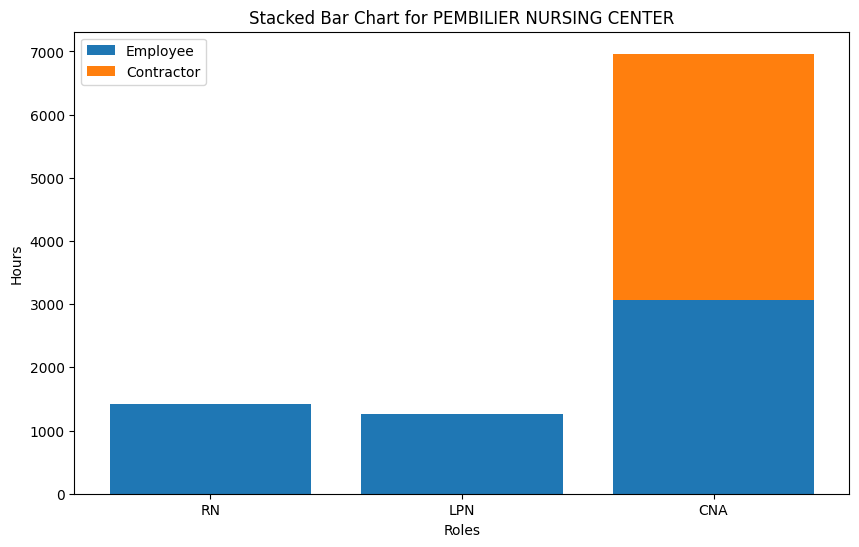

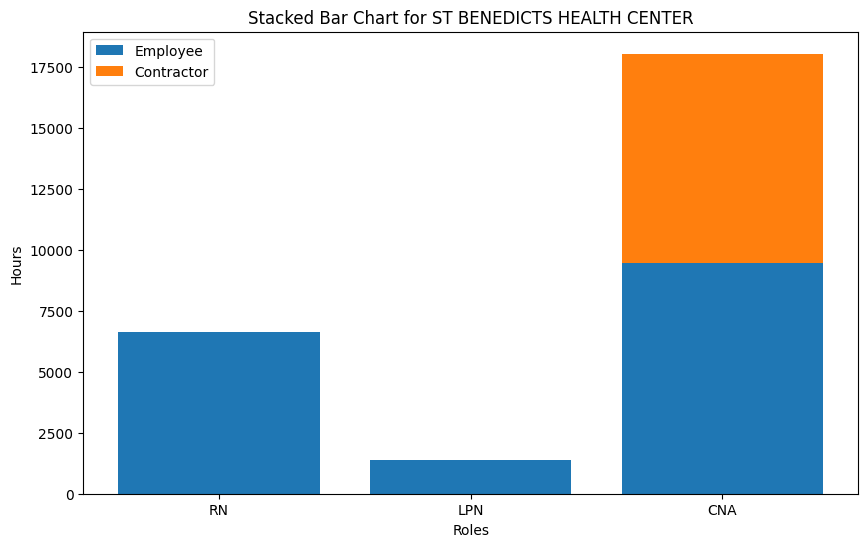

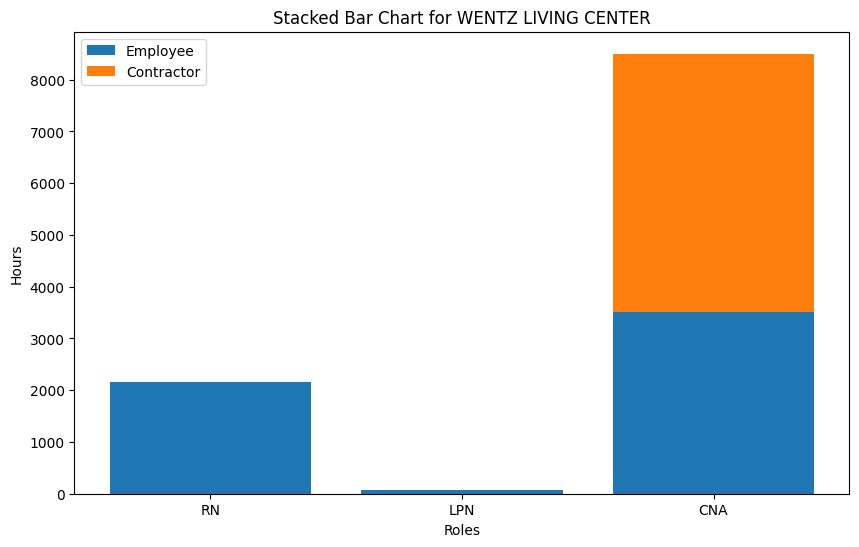

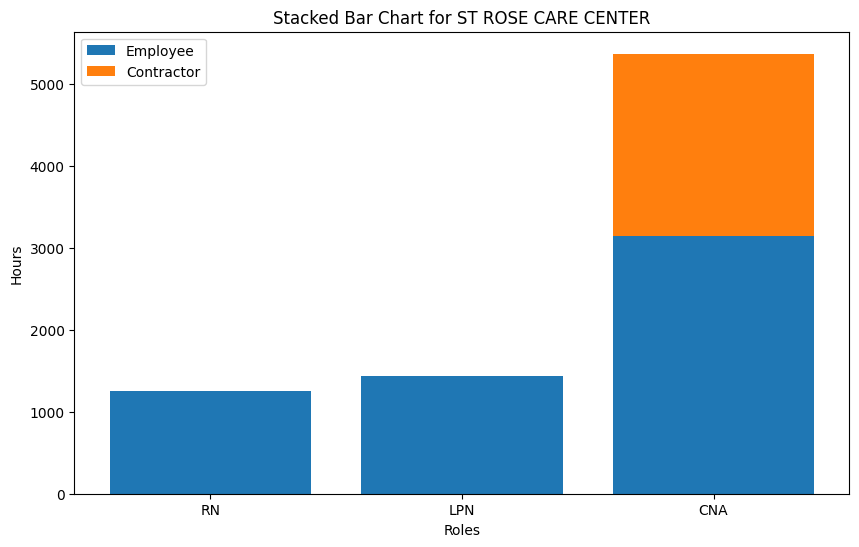

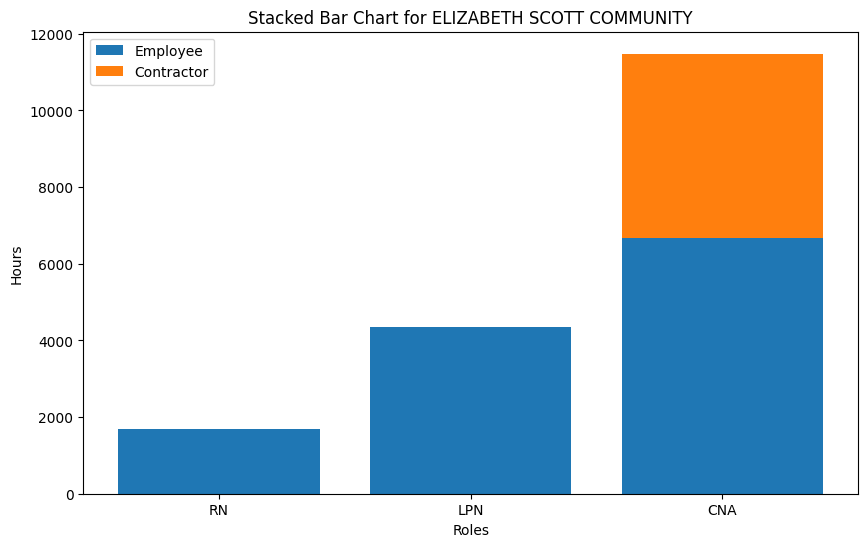

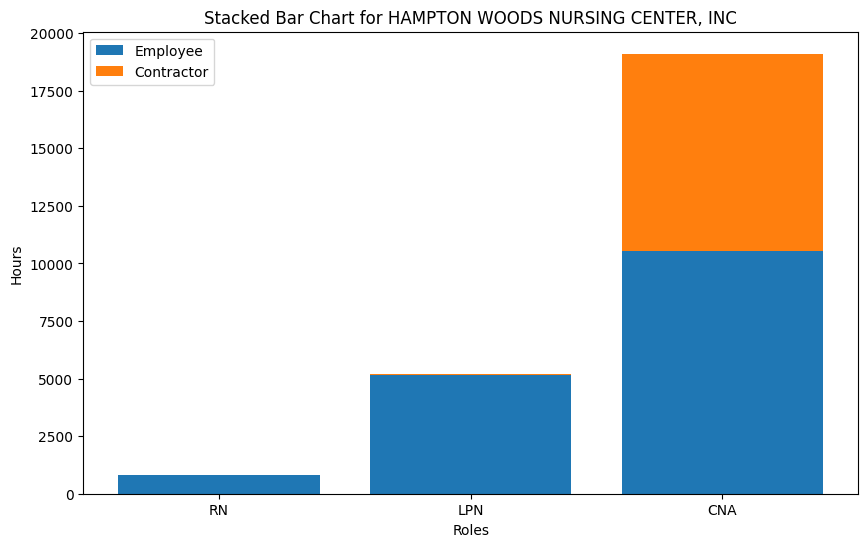

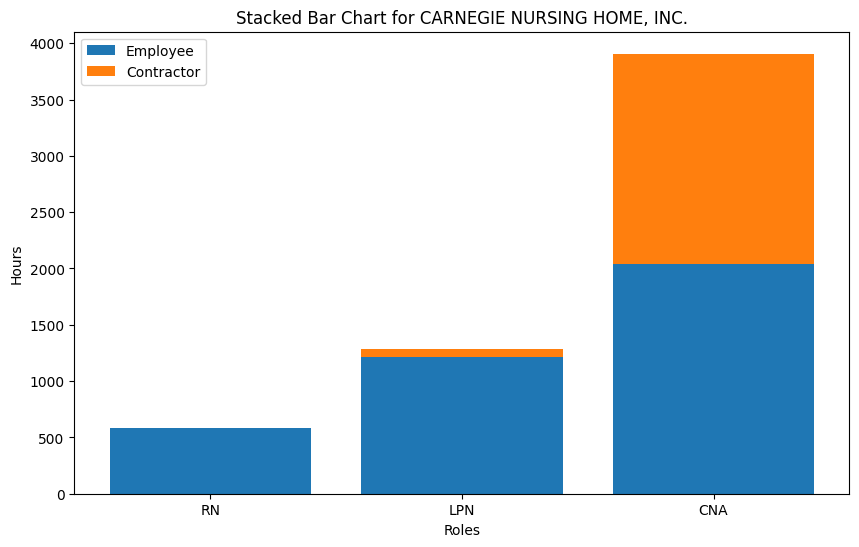

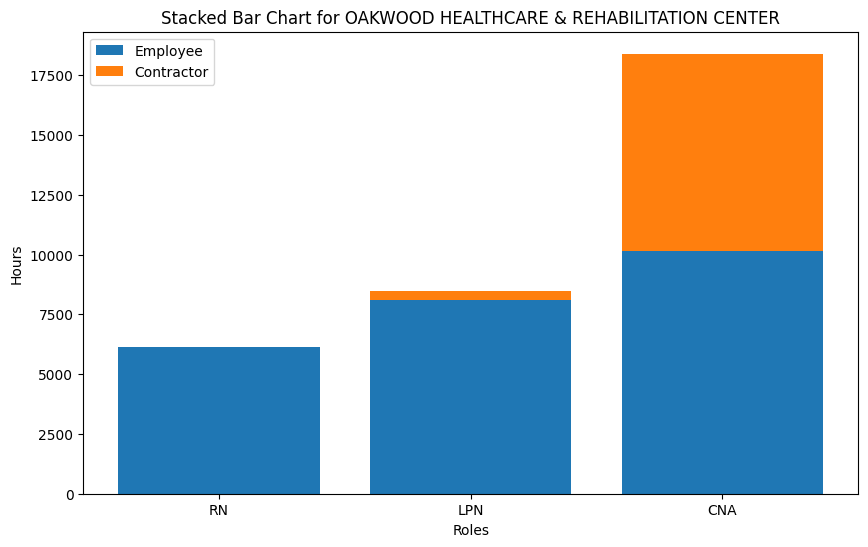

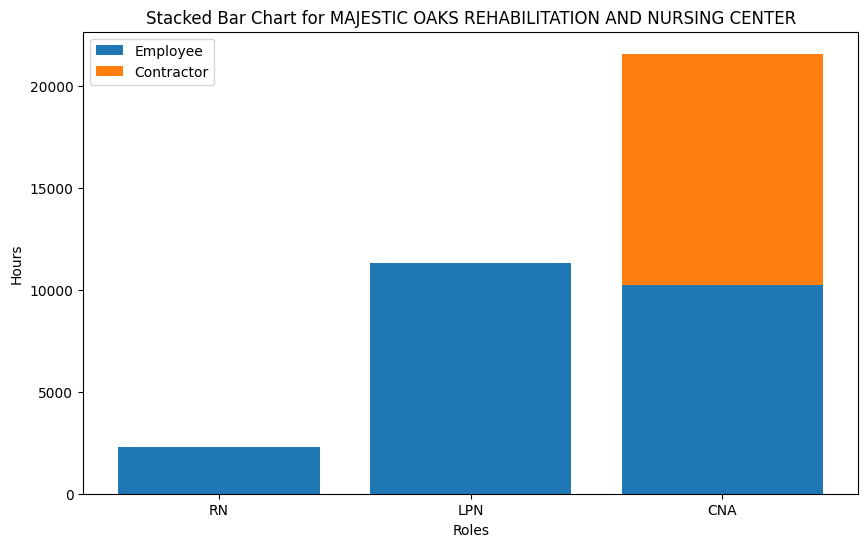

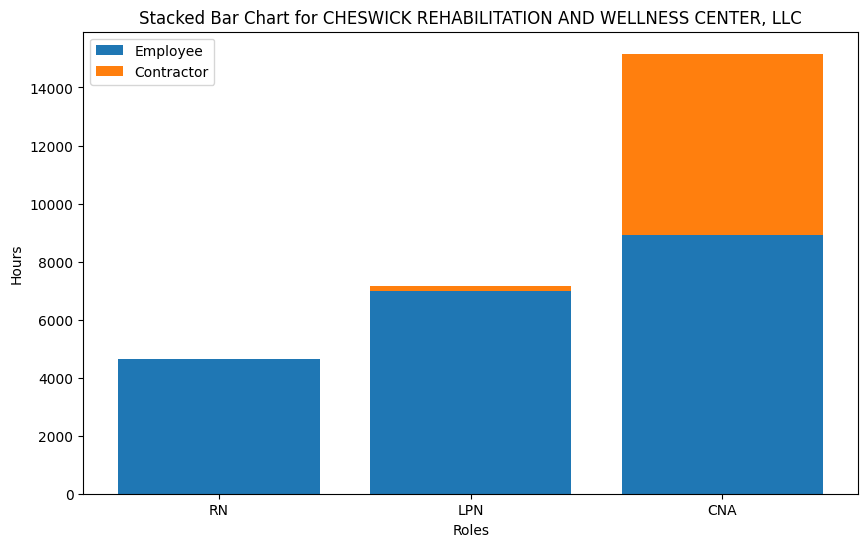

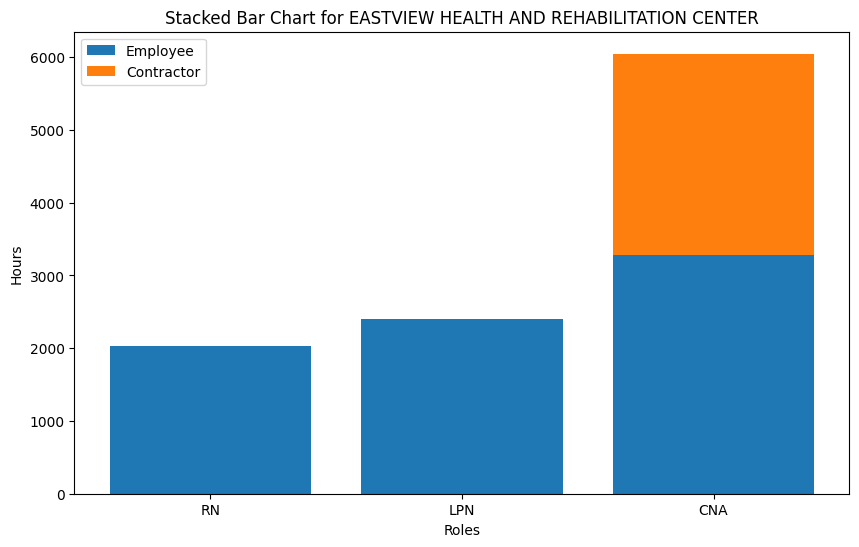

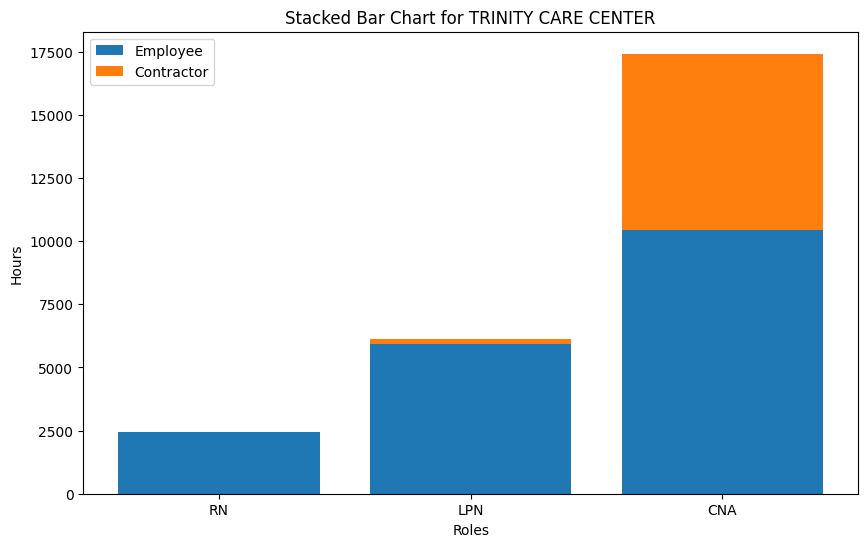

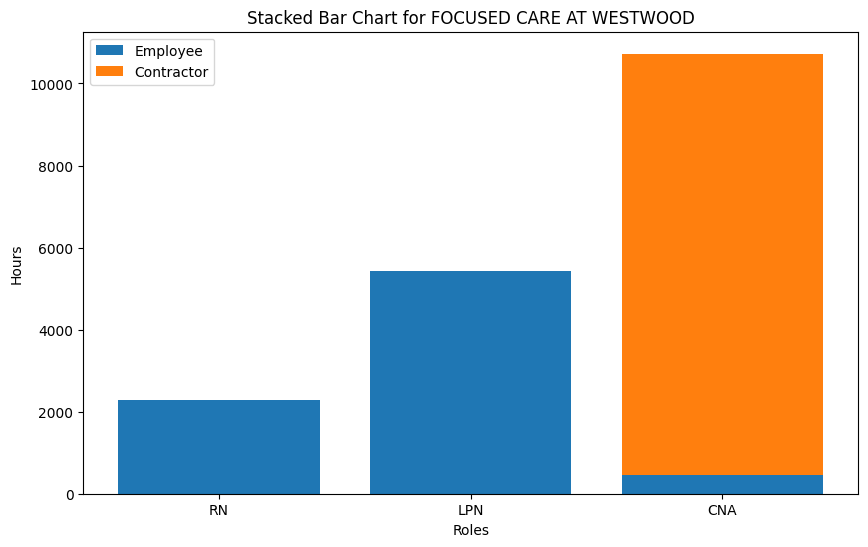

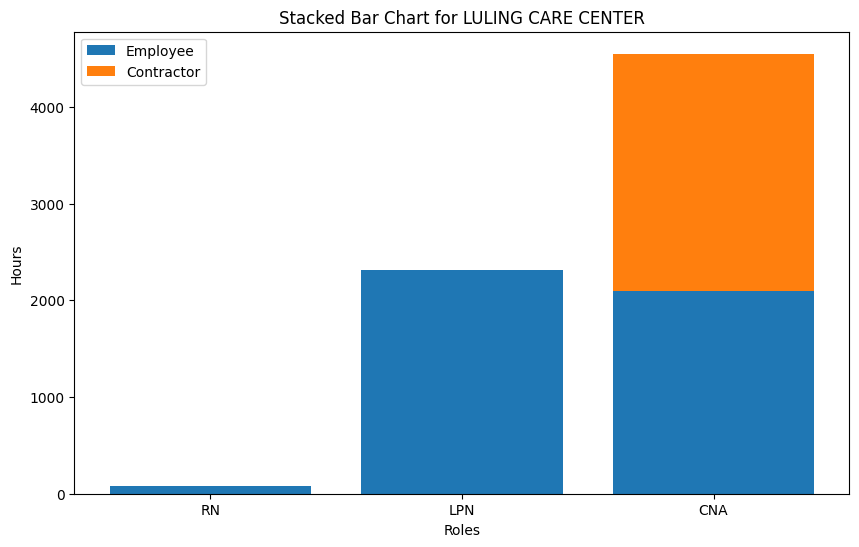

In [20]:
emp_cols = ['Hrs_RN_emp', 'Hrs_LPN_emp', 'Hrs_CNA_emp']
ctr_cols = ['Hrs_RN_ctr', 'Hrs_LPN_ctr', 'Hrs_CNA_ctr']
roles = ['RN', 'LPN', 'CNA']

# Iterate over each PROVNAME in filtered_data_ratios
for provname in filtered_data_ratios['PROVNAME']:
    # Get the row for the current PROVNAME
    row = filtered_data_ratios[filtered_data_ratios['PROVNAME'] == provname]
    
    # Get the values for emp_cols and ctr_cols for the current row
    emp_values = row[emp_cols].values[0]
    ctr_values = row[ctr_cols].values[0]
    
    # Create a stacked bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(roles, emp_values, label='Employee')
    plt.bar(roles, ctr_values, bottom=emp_values, label='Contractor')
    plt.xlabel('Roles')
    plt.ylabel('Hours')
    plt.title(f'Stacked Bar Chart for {provname}')
    plt.legend()
    plt.show()


Based on these plots, we can see that these providers are understaffed when it comes to the roles of RN and LPN providing an opportunity for Clipboard Health to provide comprehesive staffing solutions as they appear to be understaffed and may need support to balance their workforce.

In [21]:
#Filtering the data based on just the 3 roles - RN, LPN and CNA
filtered_data_2 = provider_data.loc[(provider_data['RN_ratio'] > 0.4) | (provider_data['LPN_ratio'] > 0.4) | (provider_data['CNA_ratio'] > 0.4)]
filtered_data_2.shape

(1740, 38)

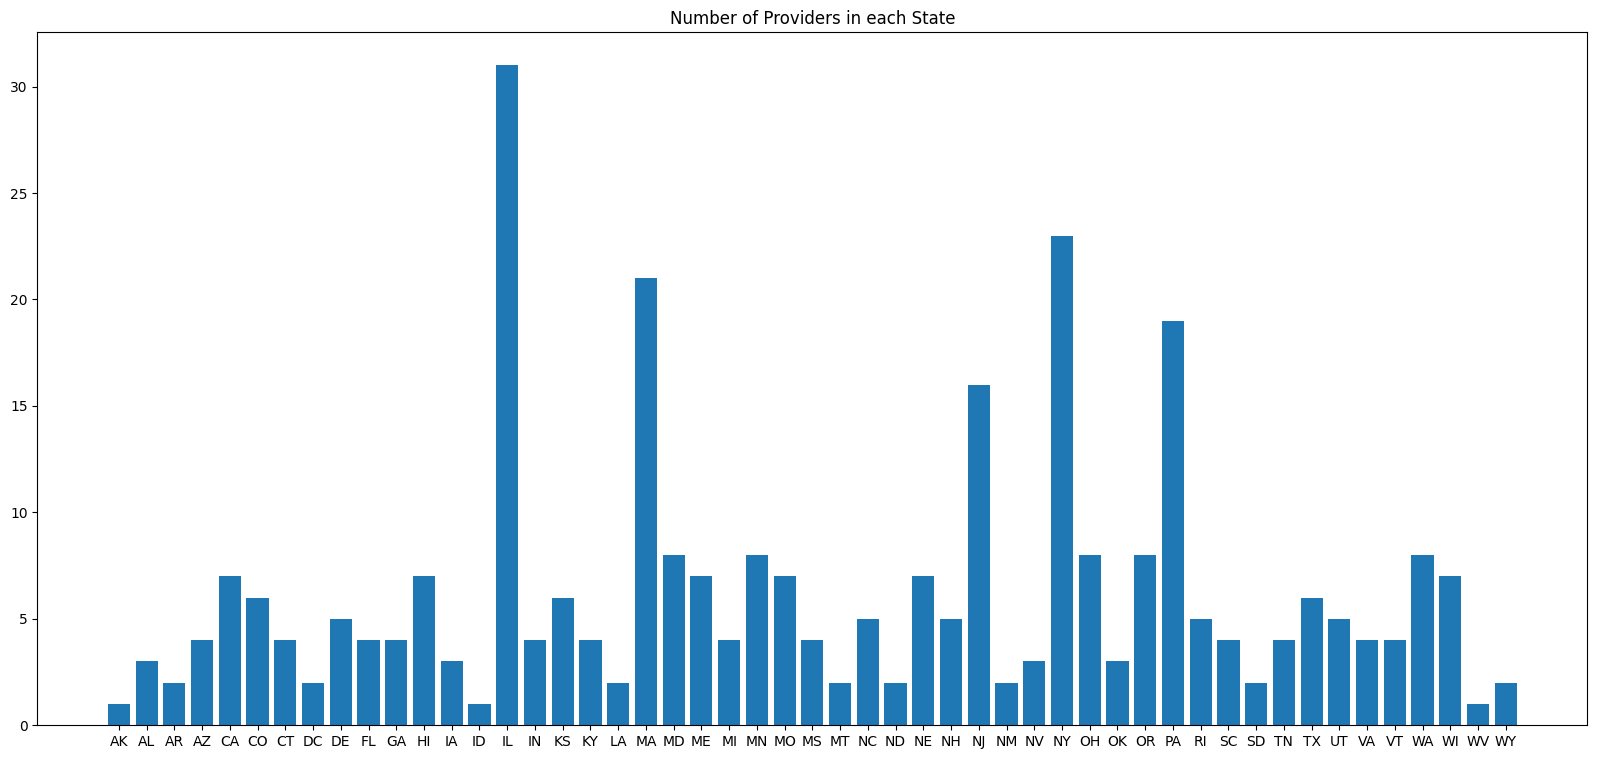

In [22]:
state_county_filtered_data = filtered_data_2.groupby(['STATE', 'COUNTY_NAME']).size().reset_index(name='count')

plt.figure(figsize=(20, 9))
plt.bar(state_county_filtered_data['STATE'], state_county_filtered_data['count'])
plt.title('Number of Providers in each State')
plt.show()

Based on the plot we can see that Clipboard Health will have better chances of acquiring clients by marketing and improving their current marketing strategy in states with high number of providers that use the contractors for the three most common roles (RN, LPN and CNA). These states are Illnois, New York, Maryland and Pennsylvania.

In [23]:
provider_info = pd.read_csv('Provider_info.csv', low_memory = False, encoding='ISO-8859-1')
provider_info.head()

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Telephone Number,Provider SSA County Code,County/Parish,Ownership Type,Number of Certified Beds,Average Number of Residents per Day,Average Number of Residents per Day Footnote,Provider Type,Provider Resides in Hospital,Legal Business Name,Date First Approved to Provide Medicare and Medicaid Services,Affiliated Entity Name,Affiliated Entity ID,Continuing Care Retirement Community,Special Focus Status,Abuse Icon,Most Recent Health Inspection More Than 2 Years Ago,Provider Changed Ownership in Last 12 Months,With a Resident and Family Council,Automatic Sprinkler Systems in All Required Areas,Overall Rating,Overall Rating Footnote,Health Inspection Rating,Health Inspection Rating Footnote,QM Rating,QM Rating Footnote,Long-Stay QM Rating,Long-Stay QM Rating Footnote,Short-Stay QM Rating,Short-Stay QM Rating Footnote,Staffing Rating,Staffing Rating Footnote,Reported Staffing Footnote,Physical Therapist Staffing Footnote,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Reported Licensed Staffing Hours per Resident per Day,Reported Total Nurse Staffing Hours per Resident per Day,Total number of nurse staff hours per resident per day on the weekend,Registered Nurse hours per resident per day on the weekend,Reported Physical Therapist Staffing Hours per Resident Per Day,Total nursing staff turnover,Total nursing staff turnover footnote,Registered Nurse turnover,Registered Nurse turnover footnote,Number of administrators who have left the nursing home,Administrator turnover footnote,Nursing Case-Mix Index,Nursing Case-Mix Index Ratio,Case-Mix Nurse Aide Staffing Hours per Resident per Day,Case-Mix LPN Staffing Hours per Resident per Day,Case-Mix RN Staffing Hours per Resident per Day,Case-Mix Total Nurse Staffing Hours per Resident per Day,Case-Mix Weekend Total Nurse Staffing Hours per Resident per Day,Adjusted Nurse Aide Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Adjusted Total Nurse Staffing Hours per Resident per Day,Adjusted Weekend Total Nurse Staffing Hours per Resident per Day,Rating Cycle 1 Standard Survey Health Date,Rating Cycle 1 Total Number of Health Deficiencies,Rating Cycle 1 Number of Standard Health Deficiencies,Rating Cycle 1 Number of Complaint Health Deficiencies,Rating Cycle 1 Health Deficiency Score,Rating Cycle 1 Number of Health Revisits,Rating Cycle 1 Health Revisit Score,Rating Cycle 1 Total Health Score,Rating Cycle 2 Standard Health Survey Date,Rating Cycle 2 Total Number of Health Deficiencies,Rating Cycle 2 Number of Standard Health Deficiencies,Rating Cycle 2 Number of Complaint Health Deficiencies,Rating Cycle 2 Health Deficiency Score,Rating Cycle 2 Number of Health Revisits,Rating Cycle 2 Health Revisit Score,Rating Cycle 2 Total Health Score,Rating Cycle 3 Standard Health Survey Date,Rating Cycle 3 Total Number of Health Deficiencies,Rating Cycle 3 Number of Standard Health Deficiencies,Rating Cycle 3 Number of Complaint Health Deficiencies,Rating Cycle 3 Health Deficiency Score,Rating Cycle 3 Number of Health Revisits,Rating Cycle 3 Health Revisit Score,Rating Cycle 3 Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Latitude,Longitude,Geocoding Footnote,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,290,Franklin,For profit - Corporation,57,50.0,NaN,Medicare and Medicaid,N,"BURNS NURSING HOME, INC.",1969-09-01,NaN,NaN,N,NaN,N,N,N,Resident,Yes,2.0,NaN,2.0,NaN,4.0,NaN,4.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,2.61906,0.42971,1.32259,1.75231

In [24]:
merged_data = pd.merge(filtered_data_2, provider_info, left_on = 'PROVNUM', right_on = 'CMS Certification Number (CCN)', how = 'inner')
merged_data.head()

,PROVNUM,PROVNAME,STATE,COUNTY_NAME,COUNTY_FIPS,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr,RNDON_ratio,RNadmin_ratio,RN_ratio,LPNadmin_ratio,LPN_ratio,CNA_ratio,NAtrn_ratio,MedAide_ratio,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Telephone Number,Provider SSA County Code,County/Parish,Ownership Type,Number of Certified Beds,Average Number of Residents per Day,Average Number of Residents per Day Footnote,Provider Type,Provider Resides in Hospital,Legal Business Name,Date First Approved to Provide Medicare and Medicaid Services,Affiliated Entity Name,Affiliated Entity ID,Continuing Care Retirement Community,Special Focus Status,Abuse Icon,Most Recent Health Inspection More Than 2 Years Ago,Provider Changed Ownership in Last 12 Months,With a Resident and Family Council,Automatic Sprinkler Systems in All Required Areas,Overall Rating,Overall Rating Footnote,Health Inspection Rating,Health Inspection Rating Footnote,QM Rating,QM Rating Footnote,Long-Stay QM Rating,Long-Stay QM Rating Footnote,Short-Stay QM Rating,Short-Stay QM Rating Footnote,Staffing Rating,Staffing Rating Footnote,Reported Staffing Footnote,Physical Therapist Staffing Footnote,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Reported Licensed Staffing Hours per Resident per Day,Reported Total Nurse Staffing Hours per Resident per Day,Total number of nurse staff hours per resident per day on the weekend,Registered Nurse hours per resident per day on the weekend,Reported Physical Therapist Staffing Hours per Resident Per Day,Total nursing staff turnover,Total nursing staff turnover footnote,Registered Nurse turnover,Registered Nurse turnover footnote,Number of administrators who have left the nursing home,Administrator turnover footnote,Nursing Case-Mix Index,Nursing Case-Mix Index Ratio,Case-Mix Nurse Aide Staffing Hours per Resident per Day,Case-Mix LPN Staffing Hours per Resident per Day,Case-Mix RN Staffing Hours per Resident per Day,Case-Mix Total Nurse Staffing Hours per Resident per Day,Case-Mix Weekend Total Nurse Staffing Hours per Resident per Day,Adjusted Nurse Aide Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Adjusted Total Nurse Staffing Hours per Resident per Day,Adjusted Weekend Total Nurse Staffing Hours per Resident per Day,Rating Cycle 1 Standard Survey Health Date,Rating Cycle 1 Total Number of Health Deficiencies,Rating Cycle 1 Number of Standard Health Deficiencies,Rating Cycle 1 Number of Complaint Health Deficiencies,Rating Cycle 1 Health Deficiency Score,Rating Cycle 1 Number of Health Revisits,Rating Cycle 1 Health Revisit Score,Rating Cycle 1 Total Health Score,Rating Cycle 2 Standard Health Survey Date,Rating Cycle 2 Total Number of Health Deficiencies,Rating Cycle 2 Number of Standard Health Deficiencies,Rating Cycle 2 Number of Complaint Health Deficiencies,Rating Cycle 2 Health Deficiency Score,Rating Cycle 2 Number of Health Revisits,Rating Cycle 2 Health Revisit Score,Rating Cycle 2 Total Health Score,Rating Cycle 3 Standard Health Survey Date,Rating Cycle 3 Total Number of Health Deficiencies,Rating Cycle 3 Number of Standard Health Deficiencies,Rating Cycle 3 Number of Complaint Health Deficiencies,Rating Cycle 3 Health Deficiency Score,Rating Cycle 3 Number of Health Revisits,Rating Cycle 3 Health Revisit Score,Rating Cycle 3 Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount 

With the new dataset, created by merging the PBJ data with provider data, the new columns of interest are:
- Ownership type
- Provider Changed Ownership in Last 12 Months
- Overall Rating
- Health Inspection Rating
- QM Rating
- Staffing Rating
- Reported LPN Staffing Hours per Resident per Day
- Reported RN Staffing Hours per Resident per Day
- Reported Total Nurse Staffing Hours per Resident per Day
- Total nursing staff turnover
- Total Number of Penalties

In [25]:
merged_data.to_csv('merged_data.csv', index=False)

In [26]:
filtered_merged_data = merged_data[['PROVNUM', 'PROVNAME', 'STATE', 'COUNTY_NAME', 'COUNTY_FIPS', 'MDScensus', 'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPN',
                                    'Hrs_LPN_emp', 'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'RN_ratio', 'LPN_ratio', 'CNA_ratio', 'Ownership Type',
                                    'Provider Changed Ownership in Last 12 Months', 'Overall Rating', 'Health Inspection Rating', 'QM Rating', 'Staffing Rating', 'Reported LPN Staffing Hours per Resident per Day',
                                    'Reported RN Staffing Hours per Resident per Day', 'Reported Total Nurse Staffing Hours per Resident per Day', 'Total nursing staff turnover',
                                    'Total Number of Penalties']]

filtered_merged_data.head()


,PROVNUM,PROVNAME,STATE,COUNTY_NAME,COUNTY_FIPS,MDScensus,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,RN_ratio,LPN_ratio,CNA_ratio,Ownership Type,Provider Changed Ownership in Last 12 Months,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Reported Total Nurse Staffing Hours per Resident per Day,Total nursing staff turnover,Total Number of Penalties
0,015023,HATLEY HEALTH CARE INC,AL,Chilton,21,86.307692,7222.53,7222.53,0.00,7442.34,2464.73,4977.61,12534.55,12534.55,0.00,0.000000,0.668823,0.000000,For profit - Corporation,N,4.0,4.0,2.0,2.0,0.94759,1.04019,3.58372,NaN,0
1,015044,"CAREGIVERS OF PLEASANT GROVE, INC",AL,Jefferson,73,43.164835,862.37,462.00,400.37,2665.44,2051.25,614.19,9481.86,8951.50,530.36,0.464267,0.230427,0.055934,For profit - Corporation,N,1.0,1.0,1.0,3.0,0.85627,0.53338,4.34869,58.8,1
2,015076,FAIR HAVEN,AL,Jefferson,73,221.318681,6775.50,3012.75,3762.75,13927.85,10458.00,3469.85,54830.25,47097.50,7732.75,0.555346,0.249130,0.141031,Non profit - Corporation,N,2.0,2.0,3.0,3.0,0.75869,0.59533,4.12137,68.1,13
3,015113,RIVER CITY CENTER,AL,Morgan,103,154.978022,8148.13,8148.13,0.00,11522.89,6808.49,4714.40,21009.71,14692.23,6317.48,0.000000,0.409133,0.300693,For profit - Corporation,N,1.0,1.0,3.0,3.0,0.81705,0.66097,2.99994,57.1,2
4,015143,FOREST MANOR HEALTH AND REHAB,AL,Tuscaloosa,125,164.835165,7496.98,5980.00,1516.98,9476.25,5666.50,3809.75,31753.85,25221.10,6532.75,0.202345,0.402031,0.205731,For profit - Limited Liability company,N,2.0,2.0,3.0,2.0,0.67120,0.57908,3.36721,63.2,0


In [27]:
#Grouping data based on ownership type\
owner_merged_data = filtered_merged_data.groupby(['Ownership Type']).agg({
    'MDScensus': 'mean',
    'RN_ratio': 'mean',
    'LPN_ratio': 'mean',
    'CNA_ratio': 'mean',
    'Staffing Rating': 'mean',
    'Reported LPN Staffing Hours per Resident per Day': 'mean',
    'Reported RN Staffing Hours per Resident per Day': 'mean',
    'Reported Total Nurse Staffing Hours per Resident per Day': 'mean',
    'QM Rating': 'mean',
})

owner_merged_data.reset_index(inplace=True)
owner_merged_data.head(12)

,Ownership Type,MDScensus,RN_ratio,LPN_ratio,CNA_ratio,Staffing Rating,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Reported Total Nurse Staffing Hours per Resident per Day,QM Rating
0,For profit - Corporation,88.033892,0.369200,0.402846,0.278778,2.290268,0.842749,0.603266,3.563403,3.126904
1,For profit - Individual,103.755540,0.401440,0.393034,0.267215,2.245902,0.733633,0.664994,3.560140,3.233333
2,For profit - Limited Liability company,101.919236,0.383247,0.394394,0.265709,2.092417,0.829140,0.563639,3.552418,3.137767
3,For profit - Partnership,117.709920,0.344072,0.478047,0.330843,2.260274,0.836481,0.512881,3.378753,3.319444
4,Government - City,36.375092,0.315550,0.243252,0.329666,4.000000,0.673668,0.789761,3.980937,3.666667
5,Government - City/county,96.824176,0.394069,0.514087,0.361196,3.384615,0.923034,0.740839,4.352172,2.923077
6,Government - County,99.372118,0.302043,0.533414,0.354150,3.313725,0.872791,0.734129,4.309502,2.980000
7,Government - Federal,38.360440,0.568250,0.664725,0.142114,3.200000,0.678998,1.285968,5.475046,1.800000
8,Government - Hospital district,43.586538,0.259855,0.388487,0.307791,2.208333,1.093981,0.686643,4.228451,3.000000
9,Government - State,79.752619,0.316643,0.458359,0.387185,4.414634,0.918694,1.147655,5.115466,3.390244


In [28]:
nursing_hours_median = filtered_merged_data['Reported Total Nurse Staffing Hours per Resident per Day'].median()

# Identify overstaffed/understaffed facilities based on median Nursing Hours per Resident
filtered_merged_data['Staffing_Category'] = filtered_merged_data['Reported Total Nurse Staffing Hours per Resident per Day'].apply(
    lambda x: 'Understaffed' if x < nursing_hours_median else ('Overstaffed' if x > nursing_hours_median else 'Adequately Staffed')
)

filtered_merged_data.head()

/var/folders/7m/44q9fvz92g78pr35vq_tm5h80000gn/T/ipykernel_32046/4260354778.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_merged_data['Staffing_Category'] = filtered_merged_data['Reported Total Nurse Staffing Hours per Resident per Day'].apply(


,PROVNUM,PROVNAME,STATE,COUNTY_NAME,COUNTY_FIPS,MDScensus,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,RN_ratio,LPN_ratio,CNA_ratio,Ownership Type,Provider Changed Ownership in Last 12 Months,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Reported Total Nurse Staffing Hours per Resident per Day,Total nursing staff turnover,Total Number of Penalties,Staffing_Category
0,015023,HATLEY HEALTH CARE INC,AL,Chilton,21,86.307692,7222.53,7222.53,0.00,7442.34,2464.73,4977.61,12534.55,12534.55,0.00,0.000000,0.668823,0.000000,For profit - Corporation,N,4.0,4.0,2.0,2.0,0.94759,1.04019,3.58372,NaN,0,Understaffed
1,015044,"CAREGIVERS OF PLEASANT GROVE, INC",AL,Jefferson,73,43.164835,862.37,462.00,400.37,2665.44,2051.25,614.19,9481.86,8951.50,530.36,0.464267,0.230427,0.055934,For profit - Corporation,N,1.0,1.0,1.0,3.0,0.85627,0.53338,4.34869,58.8,1,Overstaffed
2,015076,FAIR HAVEN,AL,Jefferson,73,221.318681,6775.50,3012.75,3762.75,13927.85,10458.00,3469.85,54830.25,47097.50,7732.75,0.555346,0.249130,0.141031,Non profit - Corporation,N,2.0,2.0,3.0,3.0,0.75869,0.59533,4.12137,68.1,13,Overstaffed
3,015113,RIVER CITY CENTER,AL,Morgan,103,154.978022,8148.13,8148.13,0.00,11522.89,6808.49,4714.40,21009.71,14692.23,6317.48,0.000000,0.409133,0.300693,For profit - Corporation,N,1.0,1.0,3.0,3.0,0.81705,0.66097,2.99994,57.1,2,Understaffed
4,015143,FOREST MANOR HEALTH AND REHAB,AL,Tuscaloosa,125,164.835165,7496.98,5980.00,1516.98,9476.25,5666.50,3809.75,31753.85,25221.10,6532.75,0.202345,0.402031,0.205731,For profit - Limited Liability company,N,2.0,2.0,3.0,2.0,0.67120,0.57908,3.36721,63.2,0,Understaffed


In [29]:
filtered_merged_data.to_csv('filtered_merged_data.csv', index=False)

This is a list of counties with the most number of understaffed facilities that have a trend of using contract workers.

In [30]:
filtered_merged_data[['PROVNAME', 'STATE', 'COUNTY_NAME', 'Staffing_Category', 'QM Rating', 'Staffing Rating']].loc[(filtered_merged_data['Staffing_Category'] == 'Understaffed') & (filtered_merged_data['QM Rating'] < 2.5)].sort_values(by = 'QM Rating', ascending = True).head(20)

,PROVNAME,STATE,COUNTY_NAME,Staffing_Category,QM Rating,Staffing Rating
1731,KENT COUNTY NURSING HOME,TX,Kent,Understaffed,1.0,2.0
702,CRESTVIEW HOME,MO,Harrison,Understaffed,1.0,1.0
699,LAWRENCE COUNTY MANOR,MO,Lawrence,Understaffed,1.0,1.0
1301,MEADOWVIEW REHABILITATION AND NURSING CENTER,PA,Philadelphia,Understaffed,1.0,3.0
1311,KINZUA HEALTHCARE AND REHABILITATION CENTER,PA,Warren,Understaffed,1.0,3.0
685,BIG SPRING CARE CENTER FOR REHAB AND HEALTHCARE,MO,Polk,Understaffed,1.0,1.0
679,RIVER CITY LIVING COMMUNITY,MO,Cole,Understaffed,1.0,2.0
663,CHESTNUT REHAB AND NURSING,MO,St. Louis,Understaffed,1.0,1.0
658,JEFFERSON CITY MANOR CARE CENTER,MO,Cole,Understaffed,1.0,1.0
640,ARBOR WALK HEALTHCARE CENTER,MS,Washington,Understaffed,1.0,1.0


This is a list of potenital new clients for clipboard health as they are currently understaffed and have a low QM rating indicating issues in current care quality.

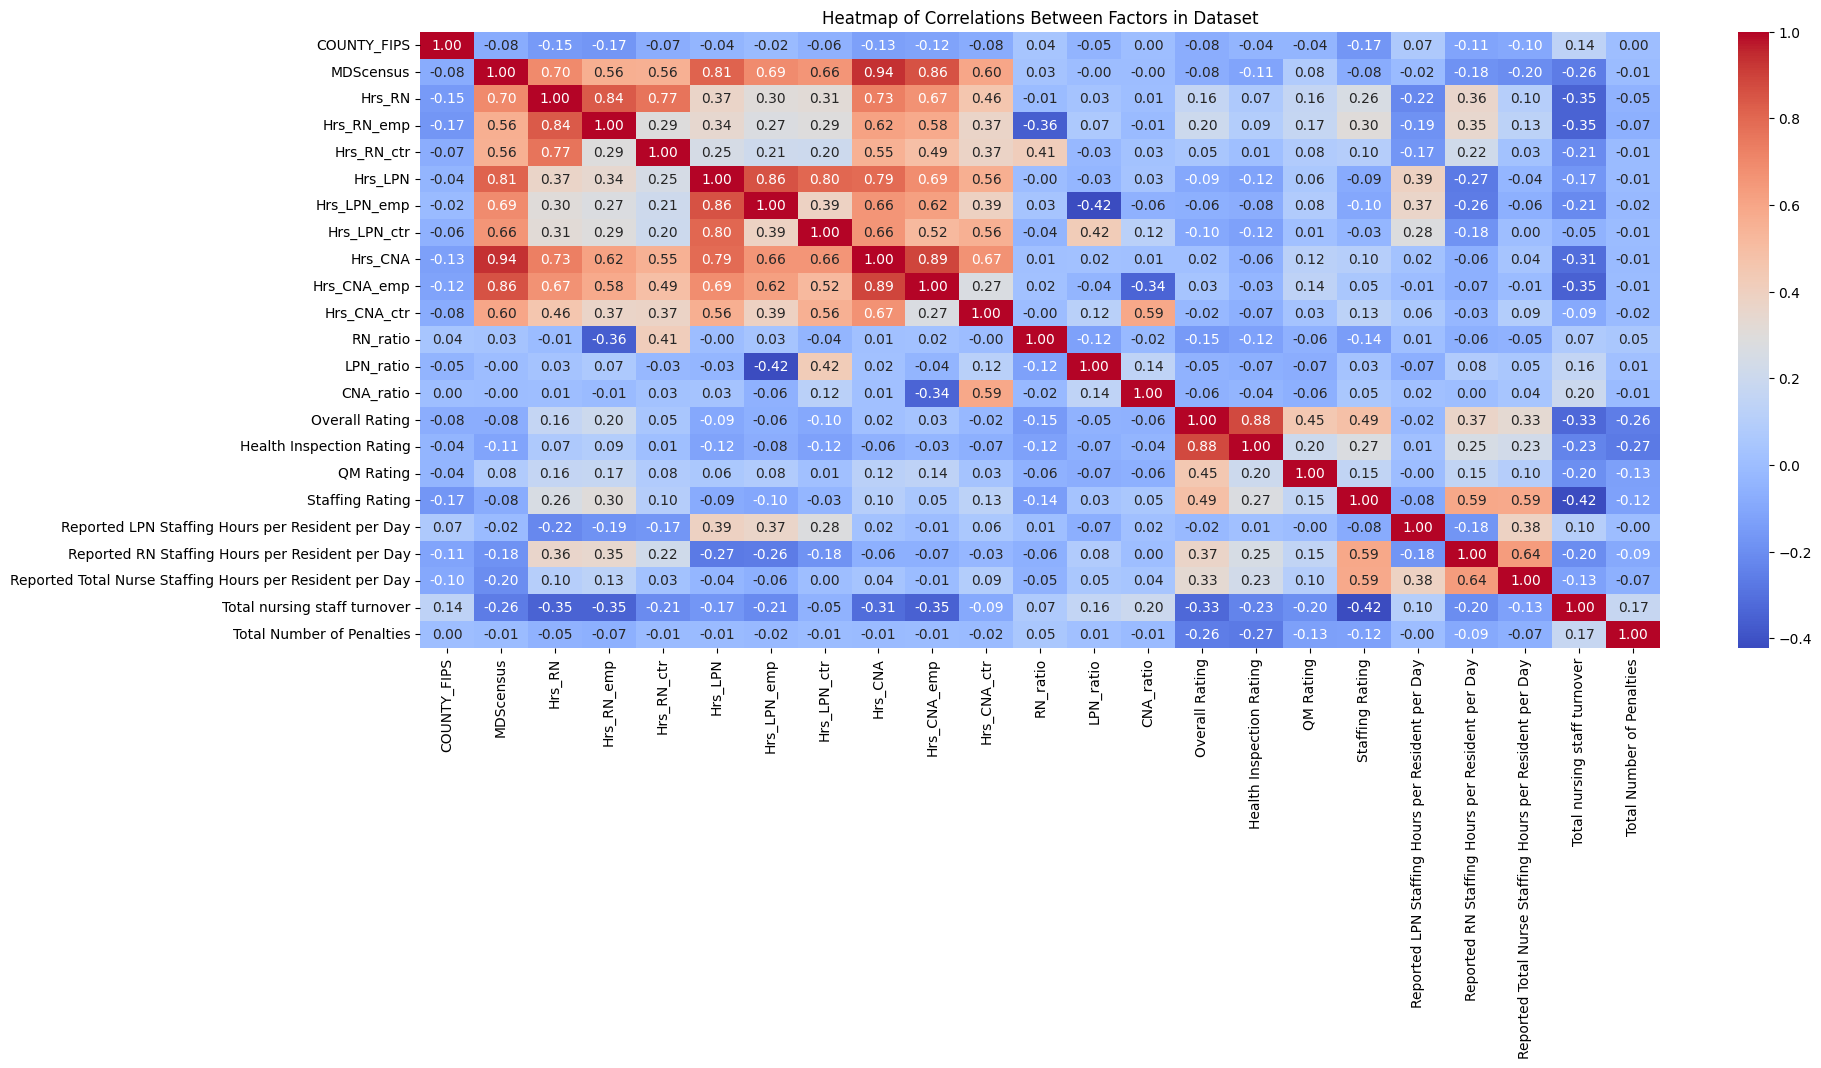

In [31]:
numerical_columns = filtered_merged_data.select_dtypes(include='number')

# Create a heatmap for the correlation of all numerical factors with 'QM Rating'
plt.figure(figsize=(20, 8))
sns.heatmap(numerical_columns.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title('Heatmap of Correlations Between Factors in Dataset')
plt.show()
